In [1]:
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nwbfile_path = '/Volumes/T7/CatalystNeuro/Schneider/conversion_nwb/sub-m53_ses-231013.nwb'
io = NWBHDF5IO(nwbfile_path, 'r')
nwbfile = io.read()
display(nwbfile)

root pynwb.file.NWBFile at 0x4858229584
Fields:
  acquisition: {
    video_camera_1 <class 'pynwb.image.ImageSeries'>,
    video_camera_2 <class 'pynwb.image.ImageSeries'>
  }
  devices: {
    intrinsic_signal_optical_imaging_laser <class 'pynwb.device.Device'>,
    lickometer <class 'pynwb.device.Device'>,
    optogenetic_stimulation_laser <class 'pynwb.device.Device'>,
    rotary_encoder <class 'pynwb.device.Device'>,
    two_photon_microscope <class 'pynwb.device.Device'>
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Identifying mistakes is important for improving performance during acoustic behaviors like speech and musicianship. Although hearing is instrumental for monitoring and adapting these behaviors, the neural circuits that integrate motor, acoustic, and goal-related signals to detect errors and guide ongoing sensorimotor adaptation in mammals remain unidentified. Here, we develop a novel closed-loop, sound-guided behavior that requires mice to use real-time acoustic feedback to guide skilled ongoing forelimb movements. Large scale electrophysiology recordings reveal that the mouse auditory cortex integrates information about sound and movement, as well as encodes error- and learning-related signals during this sound-generating behavior. Distinct groups of auditory cortex neurons signal different error types, and the activity of these neurons predicts both within-trial and across-trial behavioral adaptations. Brief, behavior-triggered optogenetic suppression of auditory cortex during error signaling hinders behavioral corrections on both rapid and long time scales, indicating that cortical error signals are necessary for skilled acoustic behaviors. Together, these experiments identify a cortical role for detecting errors and learning from mistakes and suggest that the auditory cortex plays a critical role in skilled, sound-generating behavior in mammals.
  experimenter: ['Zempolich, Grant W.' 'Schneider, David M.']
  file_create_date: [datetime.datetime(2024, 12, 18, 9, 7, 21, 778849, tzinfo=tzoffset(None, -28800))]
  identifier: b6a37a08-f2ab-45af-b49b-225aa17c8012
  institution: New York University
  intervals: {
    epochs <class 'pynwb.epoch.TimeIntervals'>,
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (3,), type "|O">
  lab: Schneider
  ogen_sites: {
    optogenetic_stimulus_site <class 'pynwb.ogen.OptogeneticStimulusSite'>
  }
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    intrinsic_signal_optical_imaging <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Mice performed the auditory guided task while optogenetic stimulation was delivered to the primary auditory cortex (A1).
  session_id: 231013
  session_start_time: 2023-10-13 00:00:00-04:00
  source_script: Created using NeuroConv v0.6.5
  source_script_file_name: /opt/anaconda3/envs/schneider_lab_to_nwb_env/lib/python3.12/site-packages/neuroconv/basedatainterface.py
  stimulus: {
    optogenetic_series <class 'pynwb.ogen.OptogeneticSeries'>
  }
  subject: subject pynwb.file.Subject at 0x5028608960
Fields:
  age: P12W/
  age__reference: birth
  description: 12-week-old C57BL/6 or VGATChR2-EYFP mice were used for all behavioral, electrophysiology, and optogenetic experiments. In the VGAT-ChR2-EYFP mouse line, channelrhodopsin (ChR2) was coupled to the vesicular GABA transporter, inducing expression in GABAergic inhibitory neurons ubiquitously across cortex and allowing for real time optogenetic inhibition of brain regions of interest.
  genotype: C57BL/6 or VGATChR2-EYFP
  sex: U
  species: Mus musculus
  strain: C57BL/6
  subject_id: m53

  timestamps_reference_time: 2023-10-13 00:00:00-04:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

Retrieve Opto and Behavioral data

In [3]:
# Opto
opto_stim_timestamps = np.asarray(nwbfile.stimulus["optogenetic_series"].timestamps)
opto_stim_data = np.asarray(nwbfile.stimulus["optogenetic_series"].data)
stim_power = 0.020
opto_onset_times = opto_stim_timestamps[opto_stim_data == stim_power]
opto_offset_times = opto_stim_timestamps[opto_stim_data == 0]

# Behavioral Events
tone_in = np.asarray(nwbfile.processing["behavior"].data_interfaces["toneIN"].timestamps)
tone_out = np.asarray(nwbfile.processing["behavior"].data_interfaces["toneOUT"].timestamps)
target_out = np.asarray(nwbfile.processing["behavior"].data_interfaces["targetOUT"].timestamps)
valve = np.asarray(nwbfile.processing["behavior"].data_interfaces["valve"].timestamps)

# Behavioral Time Series
encoder_data = np.asarray(nwbfile.processing["behavior"].data_interfaces["behavioral_time_series"]["encoder"].data)
encoder_timestamps = np.asarray(nwbfile.processing["behavior"].data_interfaces["behavioral_time_series"]["encoder"].timestamps)
lick_data = np.asarray(nwbfile.processing["behavior"].data_interfaces["behavioral_time_series"]["lick"].data)
lick_timestamps = np.asarray(nwbfile.processing["behavior"].data_interfaces["behavioral_time_series"]["lick"].timestamps)

# Behavioral Trials
trials = nwbfile.trials.to_dataframe()
trials = trials[trials.opto_trial]
example_rewarded_trial = trials[trials["rewarded"] == True].iloc[0]
example_unrewarded_trial = trials[trials["rewarded"] == False].iloc[0]

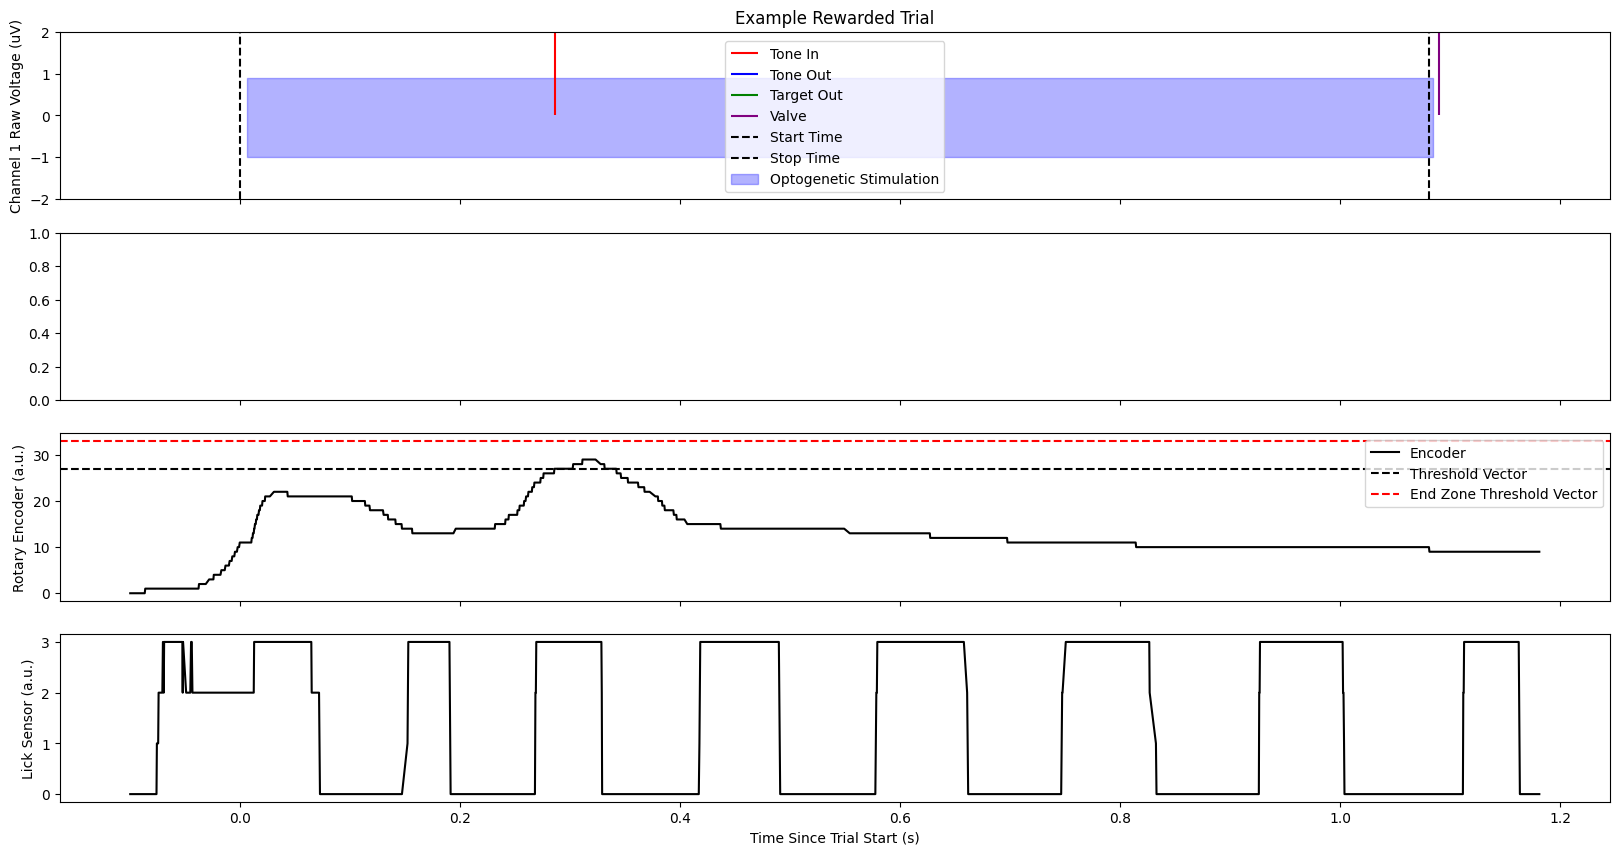

In [7]:
example_trial = example_rewarded_trial

# Define plot parameters
lineoffsets = 1
linelengths = 2
ylim = [-2, 2]
grace_time = 0.100
y = np.arange(-1, 1, 0.1)
alpha = 0.3

# Define time windows for plotting
plot_start_time = example_trial["start_time"] - grace_time
plot_end_time = example_trial["stop_time"] + grace_time
opto_onset_mask = (opto_onset_times >= plot_start_time) & (opto_onset_times <= plot_end_time)
opto_offset_mask = (opto_offset_times >= plot_start_time) & (opto_offset_times <= plot_end_time)
tone_in_mask = (tone_in >= plot_start_time) & (tone_in <= plot_end_time)
tone_out_mask = (tone_out >= plot_start_time) & (tone_out <= plot_end_time)
target_out_mask = (target_out >= plot_start_time) & (target_out <= plot_end_time)
valve_mask = (valve >= plot_start_time) & (valve <= plot_end_time)
encoder_mask = (encoder_timestamps >= plot_start_time) & (encoder_timestamps <= plot_end_time)
lick_mask = (lick_timestamps >= plot_start_time) & (lick_timestamps <= plot_end_time)

# Normalize times to trial start time
trial_start_time = example_trial["start_time"]
normalized_opto_onset_times = opto_onset_times[opto_onset_mask] - trial_start_time
normalized_opto_offset_times = opto_offset_times[opto_offset_mask] - trial_start_time
normalized_tone_in = tone_in[tone_in_mask] - trial_start_time
normalized_tone_out = tone_out[tone_out_mask] - trial_start_time
normalized_target_out = target_out[target_out_mask] - trial_start_time
normalized_valve = valve[valve_mask] - trial_start_time
normalized_encoder_timestamps = encoder_timestamps[encoder_mask] - trial_start_time
normalized_lick_timestamps = lick_timestamps[lick_mask] - trial_start_time

fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
axs[0].set_title("Example Rewarded Trial")
axs[0].eventplot(normalized_tone_in, color="red", label="Tone In", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_tone_out, color="blue", label="Tone Out", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_target_out, color="green", label="Target Out", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_valve, color="purple", label="Valve", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].axvline(0, color="black", linestyle="--", label="Start Time")
axs[0].axvline(example_trial["stop_time"] - example_trial["start_time"], color="black", linestyle="--", label="Stop Time")
for i, (onset_time, offset_time) in enumerate(zip(normalized_opto_onset_times, normalized_opto_offset_times)):
    x1 = onset_time * np.ones(len(y))
    x2 = offset_time * np.ones(len(y))
    if i == 0:
        axs[0].fill_betweenx(y, x1, x2, color="blue", alpha=alpha, label="Optogenetic Stimulation")
    else:
        axs[0].fill_betweenx(y, x1, x2, color="blue", alpha=alpha)

axs[0].set_ylim(ylim)
axs[0].set_ylabel("Channel 1 Raw Voltage (uV)")
axs[0].legend()

axs[2].plot(normalized_encoder_timestamps, encoder_data[encoder_mask], color="k", label="Encoder")
axs[2].axhline(example_trial["ThresholdVector"], color="black", linestyle="--", label="Threshold Vector")
axs[2].axhline(example_trial["endZone_ThresholdVector"], color="red", linestyle="--", label="End Zone Threshold Vector")
axs[2].set_ylabel("Rotary Encoder (a.u.)")
axs[2].legend()

axs[3].plot(normalized_lick_timestamps, lick_data[lick_mask], color="k", label="Lick")
axs[3].set_ylabel("Lick Sensor (a.u.)")
_ = axs[3].set_xlabel("Time Since Trial Start (s)")

In [8]:
normalized_opto_onset_times

array([0.0063527])

In [9]:
normalized_opto_offset_times

array([1.0845106])

In [10]:
example_trial

start_time                    198.942435
stop_time                     200.023562
rewarded                            True
time_reward_s              142896.074106
opto_trial                          True
opto_time                  142894.990439
opto_time_end              142896.068597
ITI_respect                         True
ThresholdVector                     27.0
endZone_ThresholdVector             33.0
Name: 60, dtype: object